In [2]:
import matplotlib.pyplot as plt
from metpy.units import units
from metpy.plots import USCOUNTIES
from cartopy import crs as ccrs
from cartopy.io.img_tiles import GoogleTiles, OSM, Stamen
import cartopy.feature as cfeature
import pygrib
import numpy as np

In [20]:
grib_messages = pygrib.open('ds.maxt.bin')
grib_messages.seek(0)

for message in grib_messages:
    print(message)
max_day_1 = grib_messages[2].values

1:Maximum temperature:K (max):lambert:heightAboveGround:level 2 m:fcst time 0-12 mins (max):from 202102171630
2:Maximum temperature:K (max):lambert:heightAboveGround:level 2 m:fcst time 1170-1890 mins (max):from 202102171630
3:Maximum temperature:K (max):lambert:heightAboveGround:level 2 m:fcst time 2610-3330 mins (max):from 202102171630


/Users/rhawthorne/miniconda3/envs/metpy/lib/python3.7/site-packages/cartopy/mpl/style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


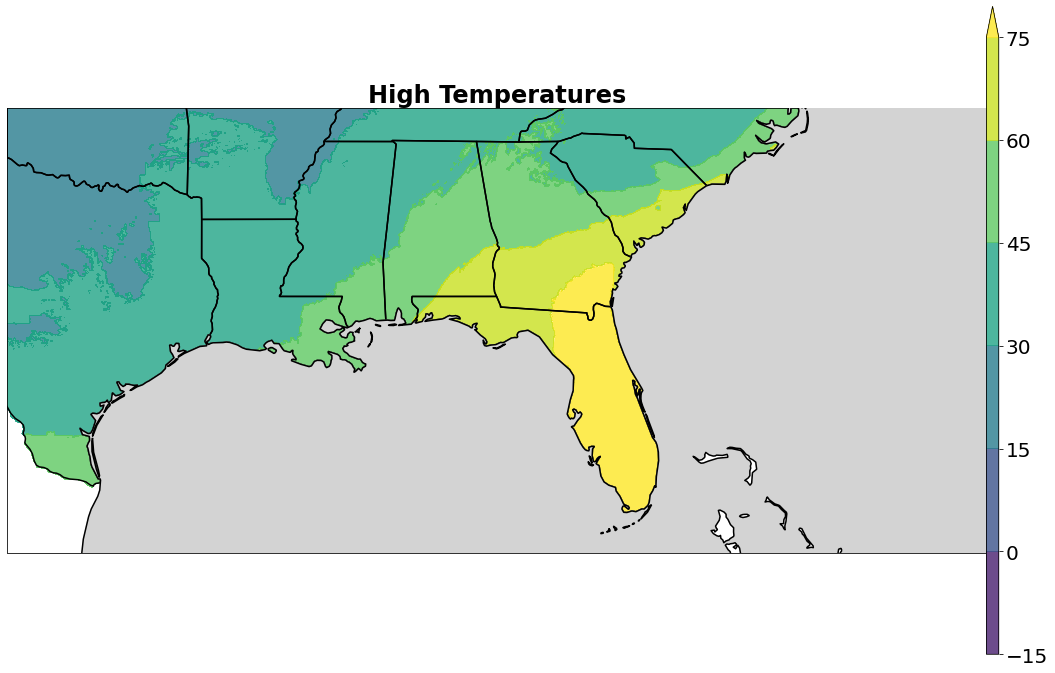

In [37]:
lats, lons = grib_messages[1].latlons()
data_crs = ccrs.Mercator()

fig = plt.figure(figsize=(16, 9))
ax = fig.add_axes([0, 0, 1, 1], projection=data_crs)
ax.set_extent([-100, -70, 24, 35])

# Setup borders (states, countries, coastlines, etc)
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), color='black', linewidth=1.5, zorder=10,)
ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=1.5)
ax.add_feature(cfeature.OCEAN.with_scale('50m'), color='lightgray', zorder=5)

contour_fill = ax.contourf(lons, lats, ((max_day_1 - 273.15) * (9/5) + 32), extend='max', alpha=0.8, 
                           transform=ccrs.PlateCarree())

for c in contour_fill.collections:
    c.set_edgecolor('face')
    c.set_linewidths(0.15)
    

cbar = plt.colorbar(contour_fill, orientation='vertical', pad=0, aspect=50)
cbar.ax.tick_params(labelsize=20)

plt.title('High Temperatures', fontsize=24, fontweight='bold')
plt.savefig('highs.png', dpi=72)